# Exploratory Data Analysis on Data Science Salaries

## Preprocessing and Data Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/shruthi/Downloads/ds_salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df.shape

(3755, 11)

In [5]:
#No. of null values in each column
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
#No. of uniques values in each colum;
df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [7]:
#Experience Level 
df.experience_level.unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [11]:
#Employment Type
df.employment_type.unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [14]:
#Company Size
df.company_size.unique()

array(['L', 'S', 'M'], dtype=object)

In [17]:
# Replacing some names for better understanding

df['experience_level']= df['experience_level'].replace('EN','Entry Level')
df['experience_level']= df['experience_level'].replace('MI','Mid Level')
df['experience_level']= df['experience_level'].replace('SE','Senior Level')
df['experience_level']= df['experience_level'].replace('EX','Executive Level')

df['employment_type'] = df['employment_type'].replace('FT', 'Full Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contractor')
df['employment_type'] = df['employment_type'].replace('PT', 'Part Time')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')


df['company_size'] = df['company_size'].replace('L', 'Large')
df['company_size'] = df['company_size'].replace('M', 'Medium')
df['company_size'] = df['company_size'].replace('S', 'Small')



In [19]:
#Rename columns
df.rename(columns={'salary_in_usd':'Salary(USD)'},inplace = True)
df.rename(columns={'work_year':'Year'},inplace=True)

In [20]:
df

,Year,experience_level,employment_type,job_title,salary,salary_currency,Salary(USD),employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level,Full Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large
1,2023,Mid Level,Contractor,ML Engineer,30000,USD,30000,US,100,US,Small
2,2023,Mid Level,Contractor,ML Engineer,25500,USD,25500,US,100,US,Small
3,2023,Senior Level,Full Time,Data Scientist,175000,USD,175000,CA,100,CA,Medium
4,2023,Senior Level,Full Time,Data Scientist,120000,USD,120000,CA,100,CA,Medium
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,Senior Level,Full Time,Data Scientist,412000,USD,412000,US,100,US,Large
3751,2021,Mid Level,Full Time,Principal Data Scientist,151000,USD,151000,US,100,US,Large
3752,2020,Entry Level,Full Time,Data Scientist,105000,USD,105000,US,100,US,Small
3753,2020,Entry Level,Contractor,Business Data Analyst,100000,USD,100000,US,100,US,Large


In [22]:
#Dropping features that is unnecessary for my analysis
df.drop(['salary'], axis = 1, inplace=True)
df.drop(['salary_currency'],axis=1,inplace=True)
df.drop(['employee_residence'], axis=1, inplace=True)


In [35]:
#Final dataframe
df1=df
df1

,Year,experience_level,employment_type,job_title,Salary(USD),remote_ratio,company_location,company_size
0,2023,Senior Level,Full Time,Principal Data Scientist,85847,100,ES,Large
1,2023,Mid Level,Contractor,ML Engineer,30000,100,US,Small
2,2023,Mid Level,Contractor,ML Engineer,25500,100,US,Small
3,2023,Senior Level,Full Time,Data Scientist,175000,100,CA,Medium
4,2023,Senior Level,Full Time,Data Scientist,120000,100,CA,Medium
...,...,...,...,...,...,...,...,...
3750,2020,Senior Level,Full Time,Data Scientist,412000,100,US,Large
3751,2021,Mid Level,Full Time,Principal Data Scientist,151000,100,US,Large
3752,2020,Entry Level,Full Time,Data Scientist,105000,100,US,Small
3753,2020,Entry Level,Contractor,Business Data Analyst,100000,100,US,Large


## Data Analysis using Seaborn and Matplotlib

### Agenda
- Top 10 jobs in the US
- Salaries Based on Features
  - Experience Level and Salary
  - Company size and Salary 
  - Employment Type and Salary
  - Remote ratio and Salary
  - Top 5 Companies Located and Salaries 
- Average Data Science Salaries based on Year
- Combining two or more features
  - Salary in terms of experience level, Employment Type 
  - Salaries with respect to experience level, year (of work), job title
- Confusion Matrix

#### Top 10 Jobs 

In [26]:
top_10=df['job_title'].value_counts()[:10].rename_axis('job_title').reset_index(name='count')
top_10.style.background_gradient(cmap='Blues')

,job_title,count
0,Data Engineer,1040
1,Data Scientist,840
2,Data Analyst,612
3,Machine Learning Engineer,289
4,Analytics Engineer,103
5,Data Architect,101
6,Research Scientist,82
7,Data Science Manager,58
8,Applied Scientist,58
9,Research Engineer,37


<Axes: title={'center': 'Top 10 jobs in 2023'}, xlabel='job_title', ylabel='count'>

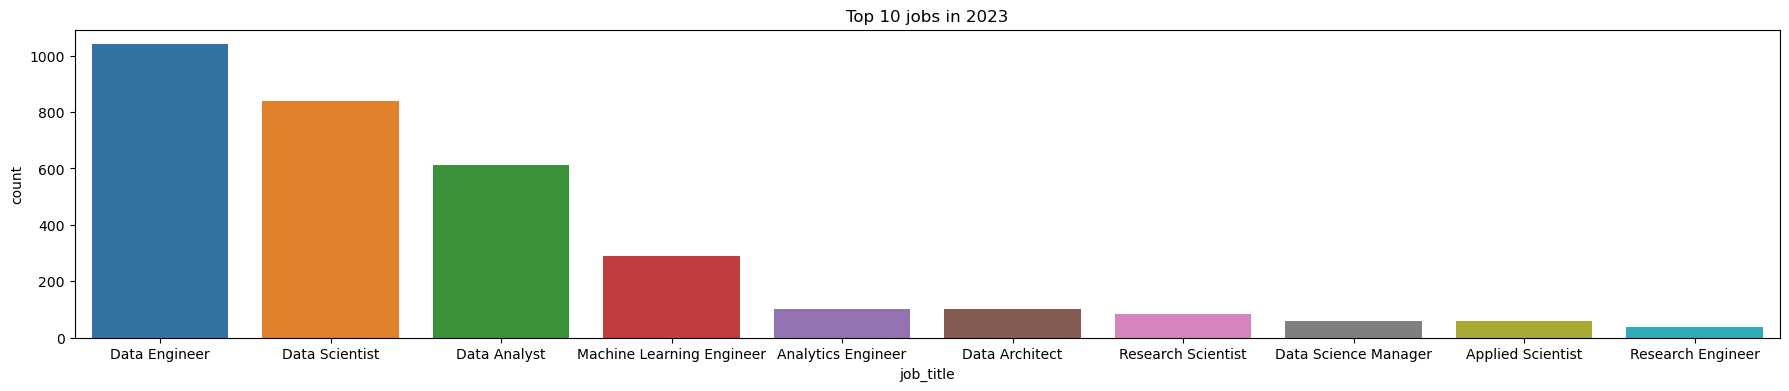

In [30]:
plt.figure(figsize=(22,4))   #Set the width and height of the figure
plt.title("Top 10 jobs in 2023")     #Add title

sns.barplot(x=top_10['job_title'], y=top_10['count'])

In [36]:
#to find the highest paid jobs in 2023

df2=df1[df1.Year==2023].sort_values(by='Salary(USD)', ascending=False, ignore_index=True)
df2.head()

,Year,experience_level,employment_type,job_title,Salary(USD),remote_ratio,company_location,company_size
0,2023,Senior Level,Full Time,AI Scientist,423834,0,IL,Large
1,2023,Senior Level,Full Time,Data Analyst,385000,0,US,Medium
2,2023,Senior Level,Full Time,Data Architect,376080,100,US,Medium
3,2023,Senior Level,Full Time,Data Scientist,370000,0,US,Medium
4,2023,Senior Level,Full Time,Research Scientist,370000,0,US,Medium


#### Salaries based on Features

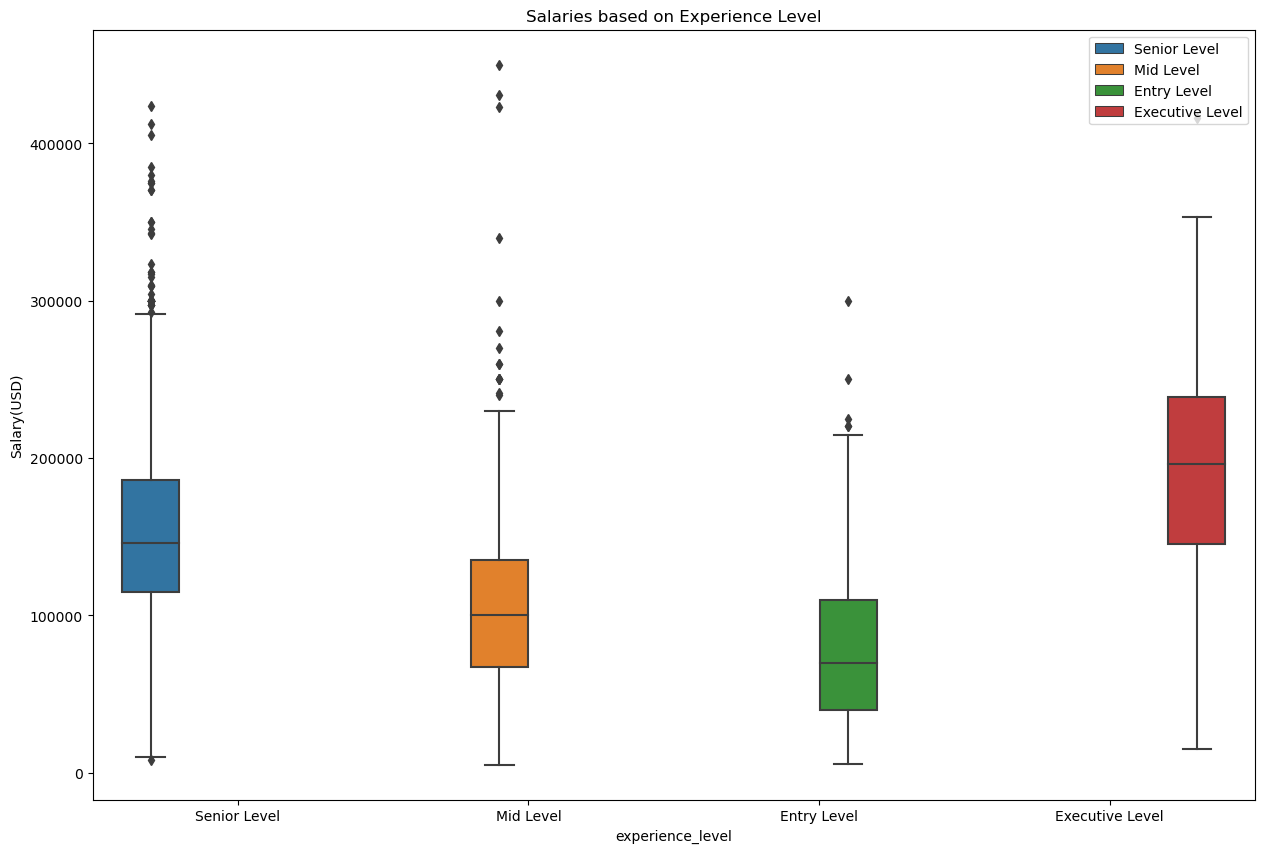

In [58]:
# Experience Level and Salary 
plt.figure(figsize=(15,10))
plt.title("Salaries based on Experience Level")
sns.boxplot(x=df1['experience_level'],y = df1['Salary(USD)'], hue= df1['experience_level'])
plt.legend(loc='upper right')

/Users/shruthi/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 32.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/Users/shruthi/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


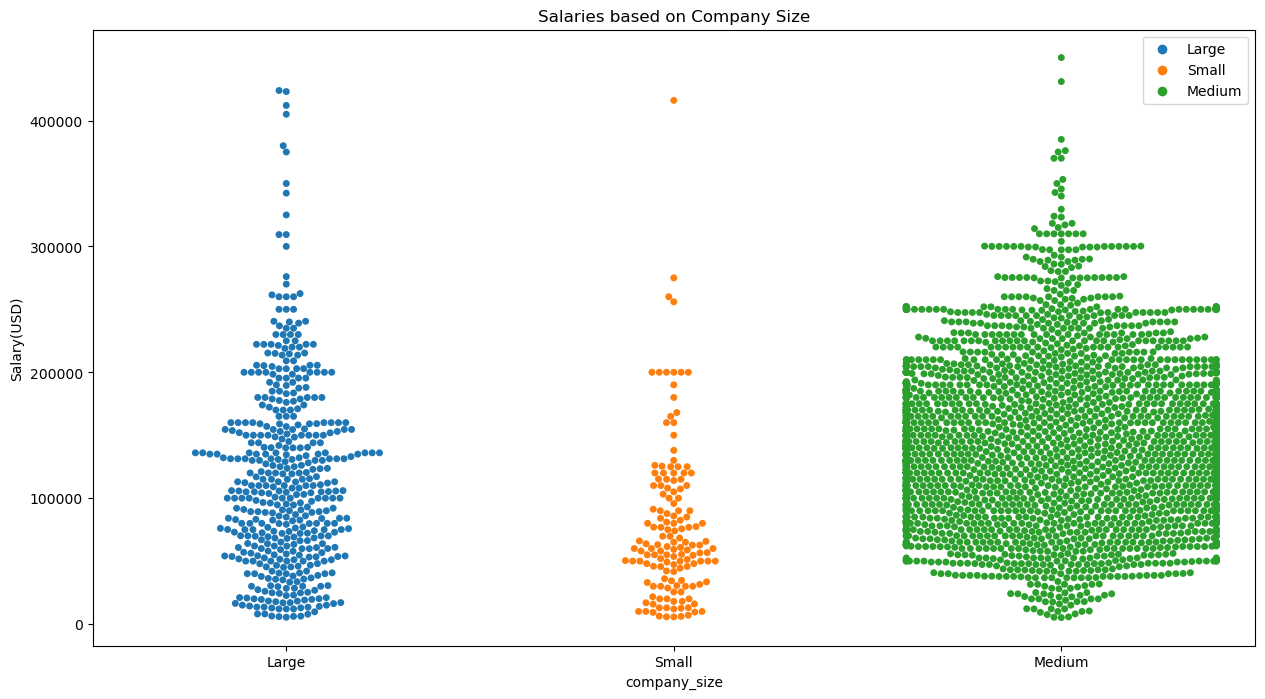

In [60]:
# Company size and Salary 
plt.figure(figsize=(15,8))
plt.title("Salaries based on Company Size")
sns.swarmplot(x=df1['company_size'],y = df1['Salary(USD)'], hue= df1['company_size'])
plt.legend(loc='upper right')

<Axes: title={'center': 'Salaries based on Employment Type'}, xlabel='employment_type', ylabel='Salary(USD)'>

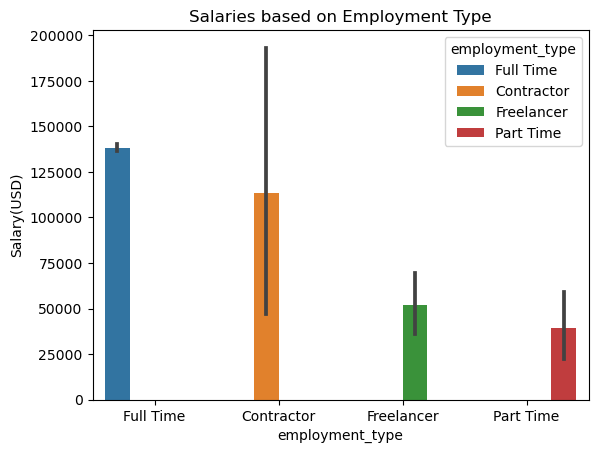

In [54]:
# Employment type and Salary
plt.title("Salaries based on Employment Type")
sns.barplot(x=df1['employment_type'],y = df1['Salary(USD)'], hue= df1['employment_type'])

In [62]:
# Salaries based on Remote Ratio 
sal_by_rem=df1["Salary(USD)"].groupby(df.remote_ratio).mean()
sal_by_rem

remote_ratio
0      144316.202288
50      78400.687831
100    136481.452830
Name: Salary(USD), dtype: float64

<Axes: title={'center': 'Salaries based on Remote Ratio'}, xlabel='remote_ratio', ylabel='Salary(USD)'>

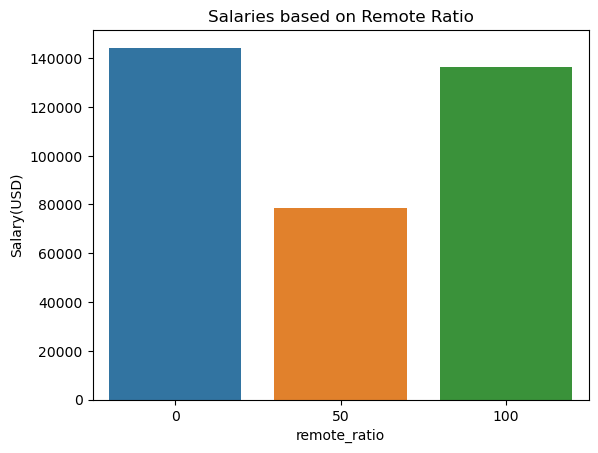

In [65]:
plt.title("Salaries based on Remote Ratio")
sns.barplot(x=sal_by_rem.index,y = sal_by_rem)

In [99]:
# Top 5 Companies Located and Salaries
sal_by_loc = df["Salary(USD)"].groupby(df.company_location).mean()
sal_by_loc.sort_values(ascending=False,inplace=True)
sal_by_loc.head()



company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
Name: Salary(USD), dtype: float64

#### Average Data Science Salaries based on Year

In [124]:

average_salary_on_year= df1["Salary(USD)"].groupby(df.Year).mean()
average_salary_on_year

Year
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
Name: Salary(USD), dtype: float64

<Axes: title={'center': 'Average Data Science Salaries based on Year'}, xlabel='Year', ylabel='Salary(USD)'>

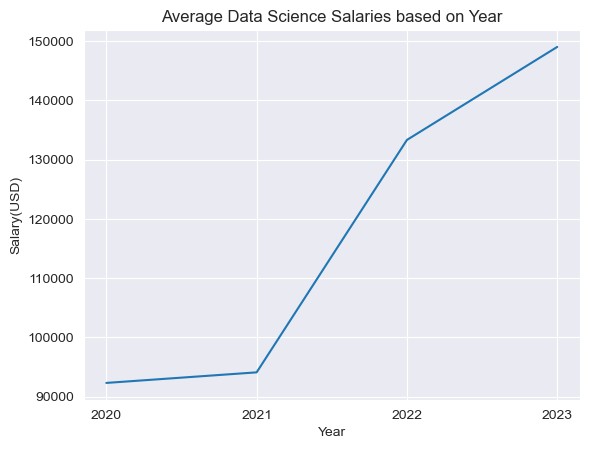

In [123]:
plt.title('Average Data Science Salaries based on Year')
plt.xlabel('Year')
plt.ylabel('Salary(USD)')


sns.lineplot(x=['2020', '2021', '2022','2023'],y=average_salary_on_year)



#### Combining two or more features

In [110]:
# Salary in terms of experience level, Employment Type
sal_exp_emp_loc = df1.groupby(['experience_level','employment_type']).mean()
sal_df= sal_exp_emp_loc.drop(['Year','remote_ratio'],axis=1)
sal_df

/var/folders/72/z8ryl7mx5yjdpxvp9q9pyp380000gn/T/ipykernel_51136/3705546557.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sal_exp_emp_loc = df1.groupby(['experience_level','employment_type']).mean()


Salary(USD)
experience_level employment_type               
Entry Level      Contractor        65234.500000
                 Freelancer        75000.000000
                 Full Time         80496.529801
                 Part Time         38885.000000
Executive Level  Contractor       416000.000000
                 Full Time        192974.566372
Mid Level        Contractor        78600.000000
                 Freelancer        41615.600000
                 Full Time        105321.489899
                 Part Time         42561.000000
Senior Level     Contractor        97500.000000
                 Freelancer        53333.333333
                 Full Time        153214.454799

In [113]:
# Salaries with respect to experience level, year and job title

# To find the total count of unique elements in the experience level column
df['experience_level'].value_counts()


Senior Level       2516
Mid Level           805
Entry Level         320
Executive Level     114
Name: experience_level, dtype: int64

In [130]:
# to create a table with selected features - experience level, year, and job title
comb_features=df.groupby(['Year','experience_level','job_title']).mean()
comb_features_sal=comb_features.drop(['remote_ratio'], axis=1)
comb_features_sal
comb_features_sal.style.background_gradient(cmap='Greens')


/var/folders/72/z8ryl7mx5yjdpxvp9q9pyp380000gn/T/ipykernel_51136/3438029212.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  comb_features=df.groupby(['Year','experience_level','job_title']).mean()


#### Confusion Matrix

/var/folders/72/z8ryl7mx5yjdpxvp9q9pyp380000gn/T/ipykernel_51136/3237722803.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True,cmap='Blues')


<Axes: title={'center': 'Confusion Matrix'}>

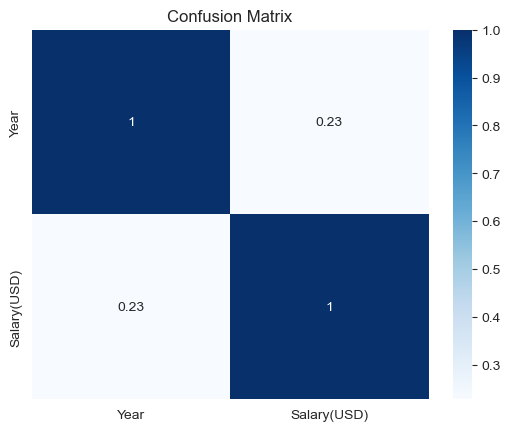

In [128]:
#Heatmap of confusion matrix
plt.title('Confusion Matrix')
df2=df1.drop(['remote_ratio'],axis =1)
sns.heatmap(df2.corr(),annot=True,cmap='Blues')

In [129]:
# Average of the Salaries in USD
sal=df['Salary(USD)'].mean()
print('Average Salary: ',round(sal,0),"(USD)")

Average Salary:  137570.0 (USD)
